## Modele spatial 2 especes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap

### Paramètres de la simulation

In [2]:
grid_size = 50          # Taille de la grille
steps = 500             # Nb d'étapes de simulation
proba_reproduce = 0.3   # Prob qu'une proie se reproduise dans une case vide voisine
proba_predate = 0.5     # Prob qu'un prédateur mange une proie voisine
proba_mortality = 0.2   # Prob qu'un prédateur meurt
proba_migrate = 0.25    # Prob qu'un individu migre vers une case voisine
initial_prey = 500      # Nb initial de proies
initial_predators = 200 # Nb initial de prédateurs

### Types d'occupants sur la grille

In [3]:
EMPTY = 0
PREY = 1
PREDATOR = 2

### Initialisation de la grille

In [4]:
def initialize_grid(grid_size, initial_prey, initial_predators):
    grid = np.zeros((grid_size, grid_size), dtype=int)
    # Ajout des proies
    for _ in range(initial_prey):
        x, y = np.random.randint(0, grid_size, 2)
        while grid[x, y] != EMPTY:
            x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREY
    # Ajout des prédateurs
    for _ in range(initial_predators):
        x, y = np.random.randint(0, grid_size, 2)
        while grid[x, y] != EMPTY:
            x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREDATOR
    return grid

### Récupération des voisins d'une cellule (avec bords périodiques)

In [5]:
def get_neighbors(grid, x, y):
    grid_size = grid.shape[0]
    neighbors = [
        ((x - 1) % grid_size, y),      # Haut
        ((x + 1) % grid_size, y),      # Bas
        (x, (y - 1) % grid_size),      # Gauche
        (x, (y + 1) % grid_size)       # Droite
    ]
    return neighbors

### Règles de la simulation

In [6]:
def update_grid(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate):
    new_grid = grid.copy()
    grid_size = grid.shape[0]
    for _ in range(grid_size*grid_size):
        x, y = np.random.randint(0, grid_size, 2)
        r = np.random.rand()
        if grid[x, y] == PREY and r > 1 - proba_reproduce:
            # Reproduction : trouver une case vide voisine
            neighbors = get_neighbors(grid, x, y)
            empty_neighbors = [(nx, ny) for nx, ny in neighbors if grid[nx, ny] == EMPTY]
            if empty_neighbors:
                nx, ny = empty_neighbors[np.random.randint(len(empty_neighbors))]
                new_grid[nx, ny] = PREY
                
        elif grid[x, y] == PREDATOR:
            if r > 1- proba_predate:
                # Prédation : trouver une proie voisine
                neighbors = get_neighbors(grid, x, y)
                prey_neighbors = [(nx, ny) for nx, ny in neighbors if grid[nx, ny] == PREY]
                if prey_neighbors:
                    nx, ny = prey_neighbors[np.random.randint(len(prey_neighbors))]
                    new_grid[nx, ny] = PREDATOR  # La proie est mangée
            if proba_migrate < r < proba_migrate + proba_mortality:
                # Mortalité : le prédateur meurt 
                new_grid[x, y] = EMPTY
        
        # Migration : déplacement aléatoire
        if grid[x, y] in [PREY, PREDATOR] and r < proba_migrate:
            neighbors = get_neighbors(grid, x, y)
            empty_neighbors = [(nx, ny) for nx, ny in neighbors if grid[nx, ny] == EMPTY]
            if empty_neighbors:
                nx, ny = empty_neighbors[np.random.randint(len(empty_neighbors))]
                new_grid[nx, ny] = grid[x, y]
                new_grid[x, y] = EMPTY
    return new_grid

### Initialisation de la grille

In [7]:
grid = initialize_grid(grid_size, initial_prey, initial_predators)

### Affichage de la grille tous les x steps

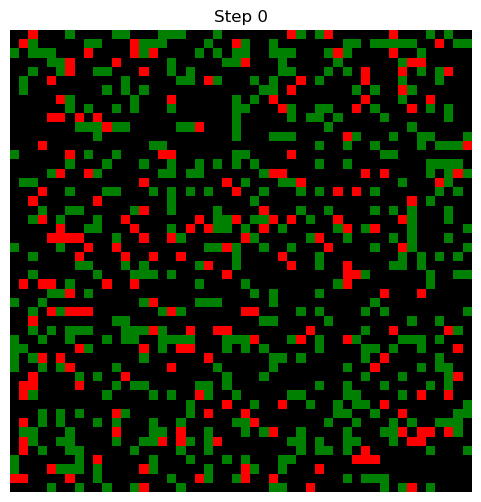

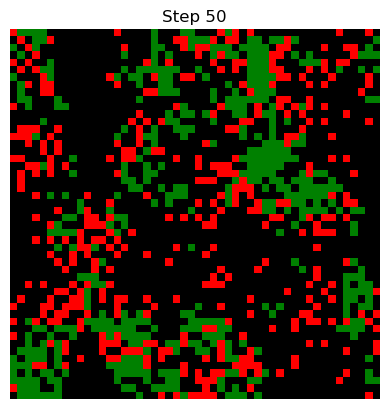

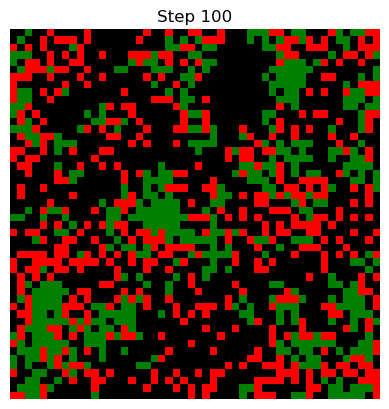

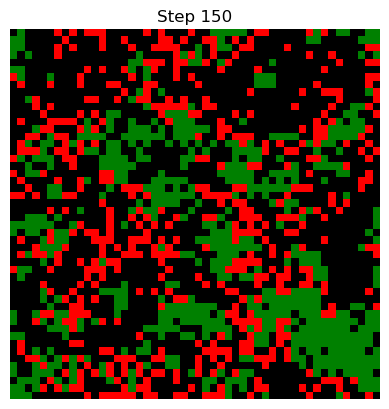

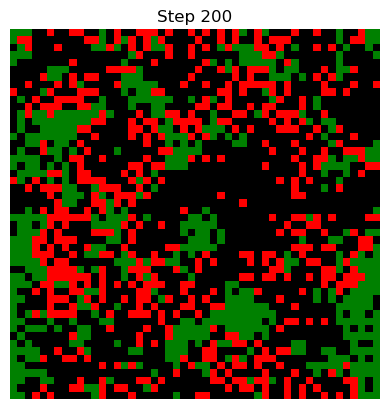

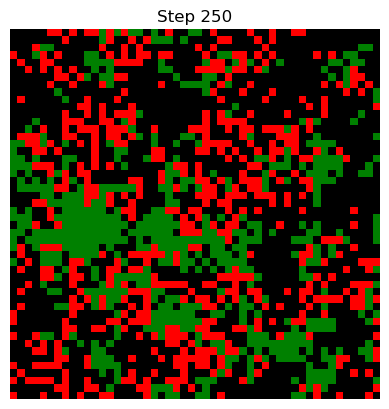

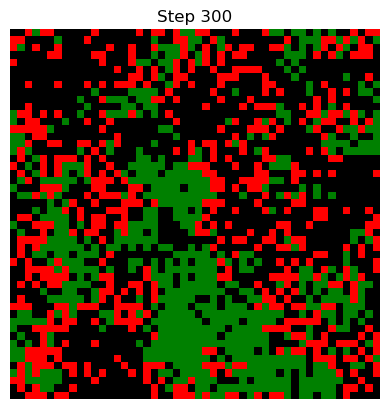

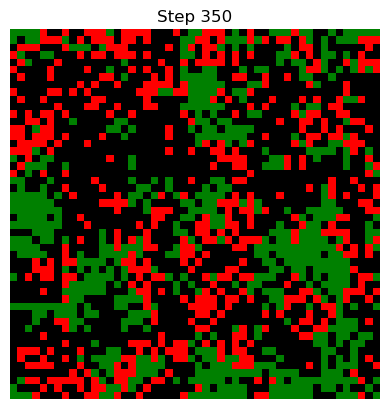

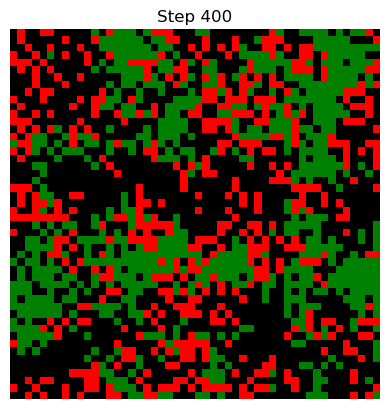

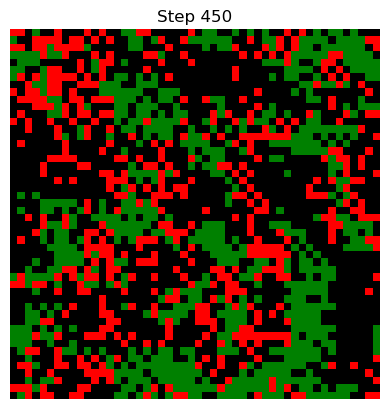

In [8]:
cmap = ListedColormap(['black', 'green', 'red'])

plt.figure(figsize=(6, 6))
for step in range(steps):
    if step % 50 == 0:  # Affiche tous les 50 steps
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        plt.title(f"Step {step}")
        plt.axis('off')
        plt.pause(0.1)
    grid = update_grid(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate)

plt.show()

### Affichage de la proportion d'individu % temps

In [9]:
densities_prey = []
densities_predator = []
densities_empty = []
#grid_size = grid.shape[0] * grid.shape[1]

grid = initialize_grid(grid_size, initial_prey, initial_predators)
for temps in range(steps):
    nbP = 0 
    nbH = 0  
    nbV = 0
    
    # Comptage des types de cellules
    nbP = np.sum(grid == PREY)
    nbH = np.sum(grid == PREDATOR)
    nbV = np.sum(grid == EMPTY)

    '''
    for x in range(grid_size):
        for y in range(grid_size):
            if grid[x, y] == PREY:
                nbP += 1
            elif grid[x, y] == PREDATOR:
                nbH += 1
            else:
                nbV += 1
    '''
    # Calcul des densités
    densiteP = nbP / grid_size * grid_size
    densiteH = nbH / grid_size * grid_size
    densiteV = nbV / grid_size * grid_size

    densities_prey.append(densiteP)
    densities_predator.append(densiteH)
    densities_empty.append(densiteV)
    
    grid = update_grid(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate)

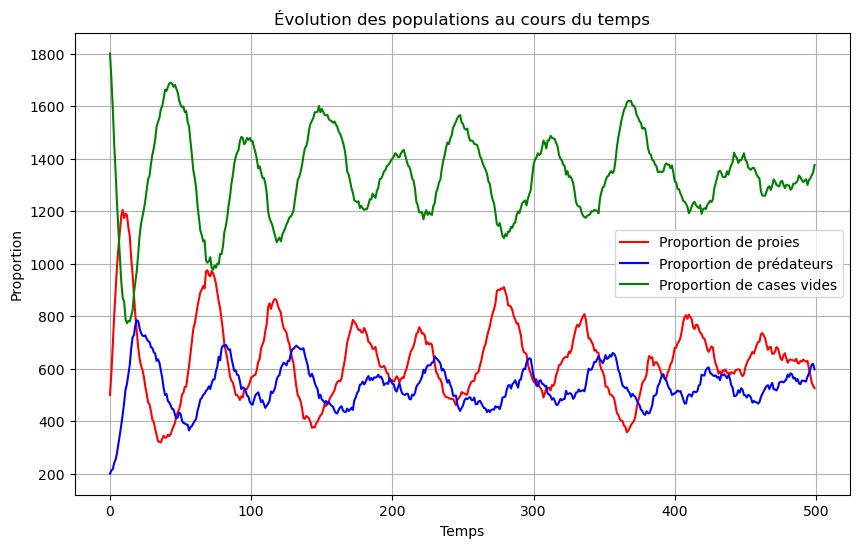

In [10]:
# Tracé des courbes
plt.figure(figsize=(10, 6))
plt.plot(densities_prey, label="Proportion de proies", color='red')
plt.plot(densities_predator, label="Proportion de prédateurs", color='blue')
plt.plot(densities_empty, label="Proportion de cases vides", color='green')

plt.title("Évolution des populations au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()